In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# --- ANSWER FOR Q1 HERE: ---

1.

Principal components are orthogonal, which means the dot product of any two principal components must be zero, leading to:

$(a, b, c, d).(0,0,1,0) = c$

which therefore means c, the third term in any other principal component, must be zero.

In [ ]:
# --- END ANSWER FOR Q1 ---

In [ ]:
# --- ANSWER FOR Q2(a) HERE: ---

#You may put your answer as commented code or in a text cell
#A = [[Sx2, Sx1x2, Sx2x2],
#  [Sx1, Sx1x1, Sx1x2],
#  [m, Sx1, Sx2]]
#B = [B1, B2, B3].T
#C = [Sx2y, Sx1y, Sy].T
#A*B = C

In [ ]:
# --- END ANSWER FOR Q2(a) ---

(2, 2) (2,)
1.4671747023847777 0.6431072487435053


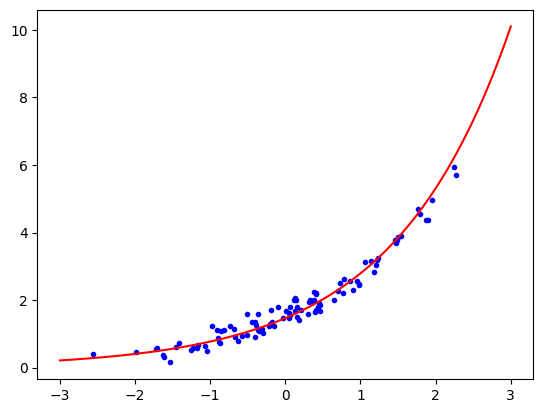

In [ ]:
# --- ANSWER FOR Q2(b) HERE: ---
#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d2b.csv")
x = np.array(df['x'])
y = np.array(df['y'])
n_points = x.size

y1 = np.log(y)

Amat = np.array(( (np.sum(x), np.sum(x**2)),
              (n_points, np.sum(x)) ))
bmat = np.array((np.sum(x*y1), np.sum(y1)))

print(Amat.shape, bmat.shape)
beta1 = np.linalg.solve(Amat, bmat)

A = np.exp(beta1[0])
B = beta1[1]

print(A,B)

xt = np.linspace(-3,3, 100)
yt = A*np.exp(B*xt)

fig, ax = plt.subplots()
plt.plot(x, y, 'b.')
#ax.scatter(x,y)
ax.plot(xt,yt,'r-')

In [ ]:
# --- END ANSWER FOR Q2(b) ---

-4.945943321409951 -1.0134089090728273 1.6887906607256082


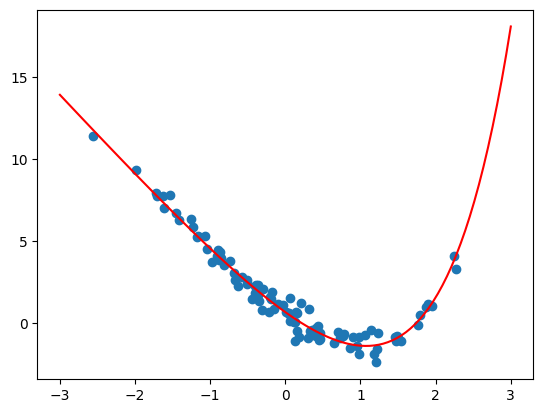

In [ ]:
# --- ANSWER FOR Q2(c) HERE: ---
#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d2c.csv")
x = np.array(df['x'])
y = np.array(df['y'])
n_points = x.size

x1 = x
x2 = np.exp(x)

Amat = np.array(( (np.sum(x2), np.sum(x1*x2), np.sum(x2**2) ),
                 (np.sum(x1), np.sum(x1**2), np.sum(x1*x2) ),
              (n_points, np.sum(x1), np.sum(x2)) ))
bmat = np.array((np.sum(x2*y), np.sum(x1*y), np.sum(y)))

beta1 = np.linalg.solve(Amat, bmat)

C = beta1[1]
D = beta1[0]
E = beta1[2]

print(C, D, E)

xt = np.linspace(-3,3, 100)
yt = C*xt + D + E*np.exp(xt)

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(xt,yt,'r-')


In [ ]:
# --- END ANSWER FOR Q2(c) ---

In [ ]:
# --- ANSWER FOR Q2(d) HERE: ---

2(d)
(i)

Extra terms are:
d lambda sum(beta^2)/d beta_n
= 2 lambda

(or in Latex:
$\frac{\partial\lambda\sum\beta_{n}^{2}}{\partial\beta_{m}}=2\lambda$)

This can be expressed in matrix form as $2\lambda I$ where $I$ is the identity matrix, assuming it operates on $(\beta_1, \beta_2, \beta_3)^t$.

(ii) If lambda is very high then it will underfit the data, resulting in a high bias but variance will be low.

In [ ]:
# --- END ANSWER FOR Q2(d) ---

In [ ]:
# --- ANSWER FOR Q3(a) HERE: ---


$(3+1)*3 + (3+1)*2 = 20$


In [ ]:
# --- END ANSWER FOR Q3(a) ---

In [ ]:
# --- ANSWER FOR Q3(b) HERE: ---
#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
t = np.array(df['y'])
n_points = x.size

def sigmoid(x):
  return 1/(1 + np.exp(-x))

#coefficient 3 may need to be changed here...
net11 = -2 * x1 + 3 * x2 + 3
net12 = -0.3 * x1 - x2 * 1 + 0.3

y1 = sigmoid(net11)
y2 = sigmoid(net12)

#y2 correct is 1.9
net21 = y1 * 1.5 + y2 * 1 - 1.8
z = sigmoid(net21)

J = np.sum((t - z)**2)/2

print(J)


3.2057852243701115


In [ ]:
# --- END ANSWER FOR Q3(b) ---

In [ ]:
# --- ANSWER FOR Q3(c) HERE: ---

3(c)

In [ ]:
w212 = 1

def sigDeriv(x):
  return sigmoid(x)*(1-sigmoid(x))

n_steps = 25
step = 0.05

for cnt in range(n_steps):
  #calc cost function for current w212
  net21 = y1 * 1.5 + y2 * w212 - 1.8
  z = sigmoid(net21)
  J = np.sum((t - z)**2)/2

  dJdw212 = np.sum(-(t-z)*sigDeriv(net21)*y2)

  w212 = w212 -dJdw212 * step

  #if monitoring progress:
  #print(w212,J)

print(w212,J)

1.9014820552331153 0.005548127735552244


In [ ]:
# --- END ANSWER FOR Q3(c) ---

In [ ]:
# --- ANSWER FOR Q4 HERE: ---

4.

$A + Bx + C x^2 + D \cos x$
becomes
$g = y^t a$

where $y = (1, x, x^2, \cos x)^t$
and $a = (A, B, C, D)^t$

The discriminant hyperplane passes through the origin because the data has been projected into a higher dimensional space; there is an extra dimension which accounts for the constant A term.

In [ ]:
# --- END ANSWER FOR Q4 ---

5.

In [ ]:
# --- ANSWER FOR Q5 HERE: ---

#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d5.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])
n_points = x1.size

w = np.array([[-0.869, 0.494]]).T
w0 = 0.0982


M = 0.23

X = np.column_stack([x1, x2])

#get g term
g = np.matmul(w.T, X.T).squeeze() + w0

#calculate the epsilon terms
eps = 1-y*g/M
#only values greater than zero are valid, so zero the others
eps[eps < 0] = 0

#total C is the linear sum of the epsilon values
C = np.sum(eps)

print("C:",C)

C: 2.4975420365465295


In [ ]:
# --- END ANSWER FOR Q5 ---

6.


In [ ]:
# --- ANSWER FOR Q6 HERE: ---

#generate the loss matrix
loss = np.array([[0, -30],
                 [-15, -18],
                 [-12, -12]])

#probability that it's a lie
plie = np.array([[0.2, 0.8]]).T

#calculate risk as a matrix multiplication
risk = np.matmul(loss, plie)

print(risk)

[[-24. ]
 [-17.4]
 [-12. ]]


In [ ]:
# --- END ANSWER FOR Q6 ---

7.

0.45


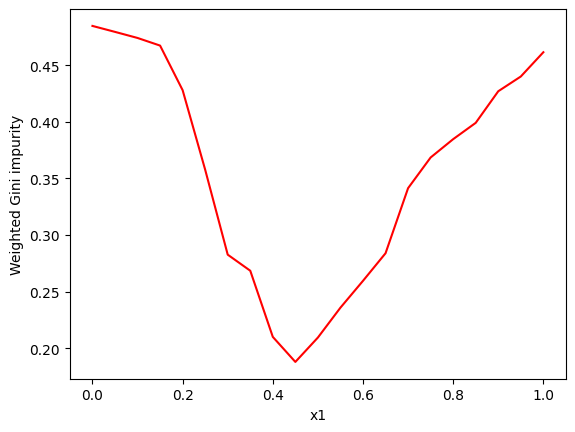

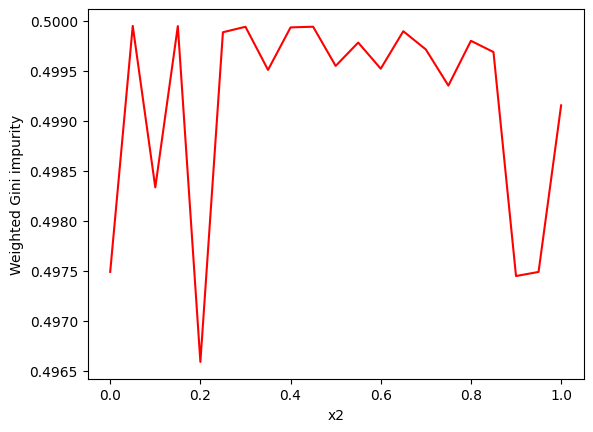

In [ ]:
# --- ANSWER FOR Q7 HERE: ---

#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d7.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])
n_points = x.size


n_bound = 21
bound_locs = np.linspace(0,1,n_bound)

#preallocate the space for gini impurities - do a matrix with 2 columns for x1 and x2
gini = np.zeros([n_bound,2])


for l in range(n_bound):
  loc = bound_locs[l]

  #x1 direction:
  #count number of points above line and below line for both classes
  c0below = np.count_nonzero(x1[y==0] < loc)
  c0above = np.count_nonzero(x1[y==0] >= loc)
  c1below = np.count_nonzero(x1[y==1] < loc)
  c1above = np.count_nonzero(x1[y==1] >= loc)

  #total points above and below
  n_below = c1below+c0below
  n_above = c1above+c0above

  #calculate probabilities
  p0below = c0below/n_below
  p0above = c0above/n_above

  #calculate Gini impurities either side of the line
  impBelow = 1 - p0below**2 - (1-p0below)**2
  impAbove = 1 - p0above**2 - (1-p0above)**2

  #get weighted average based on number of points above and below
  gini[l,0] = (impBelow*n_below+impAbove*n_above)/(n_below+n_above)

  #x2 direction - same as x1:
  c0below = np.count_nonzero(x2[y==0] < loc)
  c0above = np.count_nonzero(x2[y==0] >= loc)
  c1below = np.count_nonzero(x2[y==1] < loc)
  c1above = np.count_nonzero(x2[y==1] >= loc)

  n_above = c1above+c0above
  n_below = c1below+c0below

  p0below = c0below/(c0below + c1below)
  p0above = c0above/(c0above + c1above)

  impBelow = 1 - p0below**2 - (1-p0below)**2
  impAbove = 1 - p0above**2 - (1-p0above)**2

  #store in second column
  gini[l,1] = (impBelow*n_below+impAbove*n_above)/(n_below+n_above)


fig, ax = plt.subplots()
ax.plot(bound_locs,gini[:,0],'r-')
ax.set_xlabel('x1')
ax.set_ylabel('Weighted Gini impurity')

fig, ax = plt.subplots()
ax.plot(bound_locs,gini[:,1],'r-')
ax.set_xlabel('x2')
ax.set_ylabel('Weighted Gini impurity')

print(bound_locs[np.argmin(gini[:,0])])

In [ ]:
# --- END ANSWER FOR Q7 ---

In [ ]:
# --- ANSWER FOR Q8 HERE: ---

8.

In [ ]:
# --- ANSWER FOR Q8(a) HERE: ---

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d8.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
x3 = np.array(df['x3'])
x4 = np.array(df['x4'])
X = np.column_stack((x1, x2, x3, x4))
y = np.array(df['y'])

n_points = x1.size


xp = np.array(((0, -1, 2, 1),))

dist = X - xp
abs_dist = np.abs(X - xp)

L1dist = np.sum(abs_dist, axis=1)
#print(L1dist)

k = 3
indices_of_smallest = np.argpartition(L1dist, k)[:k]
mn = np.mean(y[indices_of_smallest]) #***


cl = int(mn > 0.5)
print(cl)


0


In [ ]:
# --- END ANSWER FOR Q8(a) ---

In [ ]:
# --- ANSWER FOR Q8(b) HERE: ---

#(b)
L2dist = np.sqrt(np.sum(abs_dist**2, axis=1))

n_0 = np.count_nonzero(y==0)
n_1 = np.count_nonzero(y==1)
p_x_0 = np.sum(1/2/np.pi*np.exp(-1/2*L2dist[y==0]**2))/n_0
p_x_1 = np.sum(1/2/np.pi*np.exp(-1/2*L2dist[y==1]**2))/n_1

print(p_x_0, p_x_1)

p_0 = n_0/(n_0+n_1)
p_1 = n_1/(n_0+n_1)

p_x = p_x_0 * p_0 + p_x_1 * p_1
p_0_x = p_x_0 * p_0 / p_x
p_1_x = p_x_1 * p_1 / p_x

print(p_0_x)
print(p_1_x)


0.0117835238475955 0.006577149328836313
0.6599661917890142
0.34003380821098583


In [ ]:
# --- END ANSWER FOR Q8(b) ---

In [ ]:
# --- ANSWER FOR Q8(c) HERE: ---

By classifying on the nearest neighbour (or neighbours), rather than defining a specific distance (which is the approach with a Parzen window), the routine automatically selects a suitable distance, simplifying model tuning. It also automatically accounts for localised differences in density in the training points through the dataset.

In [ ]:
# --- END ANSWER FOR Q8(c) ---